# 5003 HW5 

ZHANG Juntao - 20908272

## Problem Set 5B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Detrended Fluctuation Analysis of Hang Seng Index(DFA of HSI)

#### a) load data and clean

In [2]:
data = pd.read_csv('Desktop/^HSI.csv')
data.dropna(axis=0, how='any', inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00
1,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00
2,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00
3,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.000000e+00
4,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.000000e+00
...,...,...,...,...,...,...,...
9102,2022-11-04,15442.759766,16513.160156,15442.759766,16161.139648,16161.139648,3.951121e+09
9103,2022-11-07,16031.790039,16821.890625,15980.849609,16595.910156,16595.910156,3.227830e+09
9104,2022-11-08,16640.599609,16719.009766,16429.810547,16557.310547,16557.310547,2.071209e+09
9105,2022-11-09,16552.800781,16730.199219,16213.030273,16358.519531,16358.519531,3.270965e+09


#### b) Absolute returns

In [3]:
adj_price = data[['Adj Close']].values.ravel()
abs_returns = np.abs(np.array([np.log(float(i) / float(j)) for i, j in zip(adj_price[1:], adj_price)]))
abs_returns, len(abs_returns)

(array([0.00483057, 0.01226579, 0.00893868, ..., 0.00232856, 0.0120789 ,
        0.01710789]),
 8855)

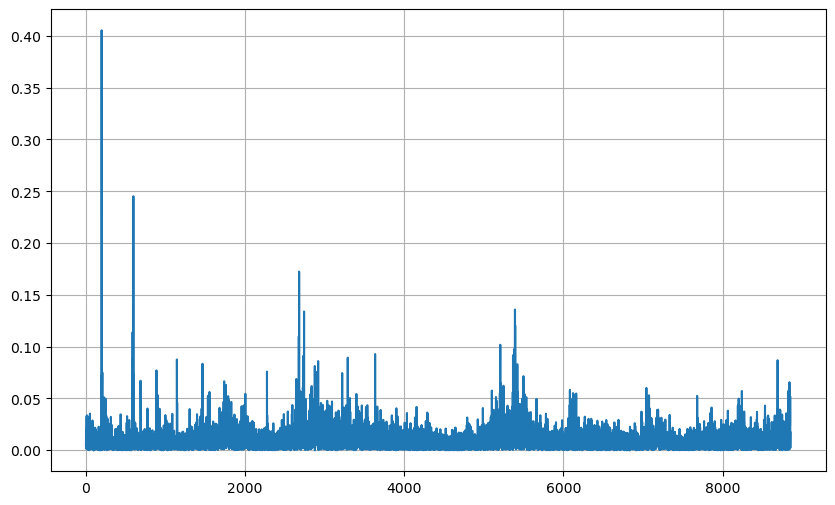

In [4]:
plt.figure(figsize=(10,6))
plt.plot(abs_returns)
plt.grid(linestyle='-')
plt.show()

#### c) Average of absolute returns

In [5]:
average = np.average(abs_returns)
average

0.010708395576091885

#### d) Cumulative sum

In [6]:
cumulative_sum = np.array([np.sum(abs_returns[:i])-i*average for i in range(1, len(abs_returns)+1)])
cumulative_sum, len(cumulative_sum)

(array([-0.00587783, -0.00432043, -0.00609015, ..., -0.00777   ,
        -0.0063995 ,  0.        ]),
 8855)

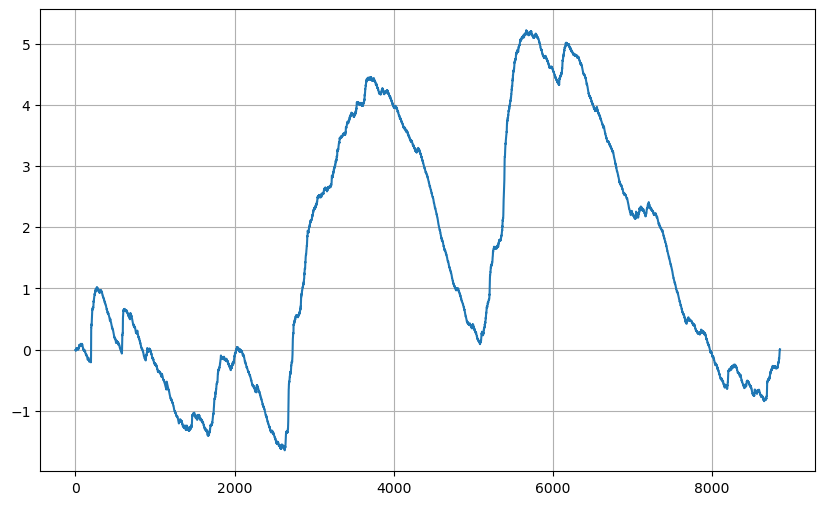

In [7]:
plt.figure(figsize=(10,6))
plt.plot(cumulative_sum)
plt.grid()
plt.show()

#### e) Sliding Window Method

In [8]:
start = np.round(np.log10(7), 1)
end = np.round(np.log10(len(cumulative_sum)-6), 1)
x = np.arange(start, end+0.1, 0.1)
t = np.array(list(map(lambda x: int(10**x), x)))
t, len(t)

(array([   6,    7,   10,   12,   15,   19,   25,   31,   39,   50,   63,
          79,   99,  125,  158,  199,  251,  316,  398,  501,  630,  794,
         999, 1258, 1584, 1995, 2511, 3162, 3981, 5011, 6309, 7943]),
 32)

#### f) & g)  Get figure of $\tau$ and $F(\tau)$ 

In [9]:
def fluctuation(t):
    x = np.arange(t)
    Ex, Ex2 = (t-1)/2, (t-1)*(2*t-1)/6
    Ft = []
    for i in range(len(cumulative_sum)-t):
        y = cumulative_sum[i:i+t]
        Fti = np.sqrt(np.mean(y**2) - np.mean(y)**2 - (np.dot(x,y)/t-Ex*np.mean(y))**2/(Ex2-Ex**2))
        Ft.append(Fti)
    return np.mean(Ft)

In [10]:
Ft_v2 = np.array(list(map(lambda t: fluctuation(t), t)))
Ft_v2

array([0.00475894, 0.00527585, 0.00659721, 0.0073589 , 0.0084075 ,
       0.00970542, 0.0115855 , 0.01348567, 0.01605864, 0.01956439,
       0.0236832 , 0.02882275, 0.03560127, 0.04492419, 0.05734639,
       0.07287742, 0.09141759, 0.11358235, 0.14227396, 0.17951085,
       0.22854048, 0.29630063, 0.38832111, 0.50628512, 0.65216791,
       0.83732214, 1.07156108, 1.34629611, 1.5127924 , 1.52459361,
       1.65962218, 1.87159708])

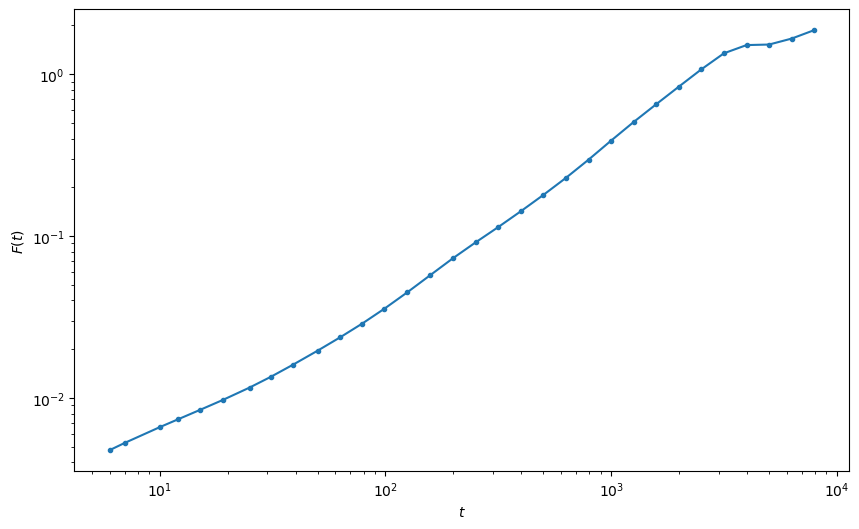

In [11]:
plt.figure(figsize=(10,6))
plt.plot(t, Ft_v2, marker='.')
plt.xlabel('$t$')
plt.ylabel('$F(t)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### h) Obtain the exponent $\alpha$

In [12]:
from scipy.stats import linregress

In [13]:
result1 = linregress(np.log(t[:9]), np.log(Ft_v2[:9]))
result1.slope, result1.rvalue**2

(0.6376094789653494, 0.9988699717127908)

In [14]:
result2 = linregress(np.log(t[9:29]), np.log(Ft_v2[9:29]))
result2.slope, result2.rvalue**2

(1.029075460008141, 0.998840520156123)

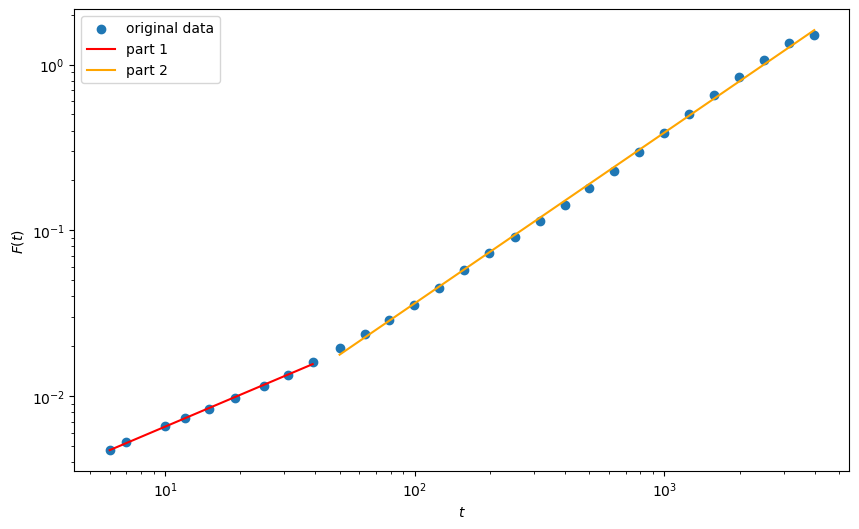

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(t[:29], Ft_v2[:29], label='original data')
plt.plot(t[:9], np.exp(result1.intercept + result1.slope*np.log(t[:9])), 'red', label='part 1')
plt.plot(t[9:29], np.exp(result2.intercept + result2.slope*np.log(t[9:29])), 'orange', label='part 2')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$F(t)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

Conclusion:

- Discard last three data points that deviate from the power law, and get two parts. 

- $\alpha_{1} = 0.6376$ at short time scale (part 1).

- $\alpha_{2} = 1.0291$ at long time scale (part 2).

### 3. Power Spectral Density of Hang Seng Index(PSD of HSI)

#### a) ACF of absolute returns

In [16]:
from numpy.fft import fft, fftfreq, rfft

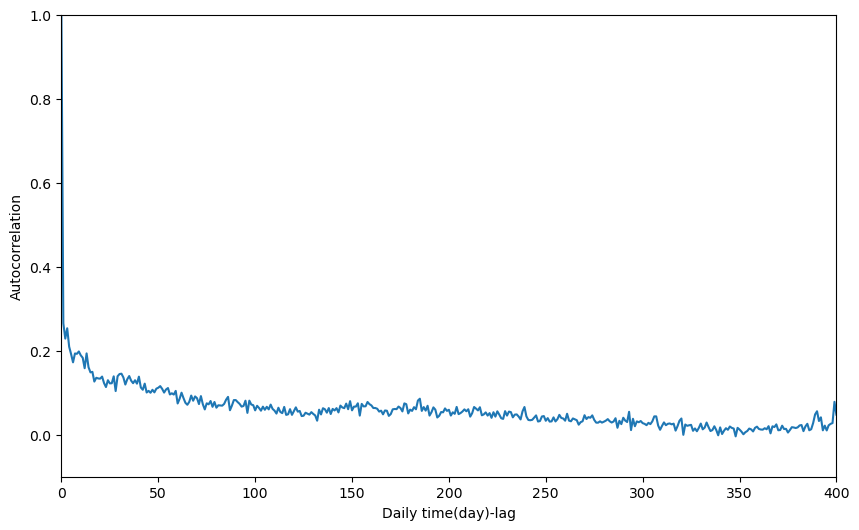

In [17]:
lag = 400
plt.figure(figsize=(10,6))
zeromean_abs_returns = abs_returns-np.mean(abs_returns)
res = plt.acorr(zeromean_abs_returns, maxlags=lag ,usevlines=False, linestyle='solid', marker='')
plt.axis([0, lag, -0.1, 1])
plt.xlabel('Daily time(day)-lag')
plt.ylabel('Autocorrelation')
plt.show()

#### b) Power spectral density

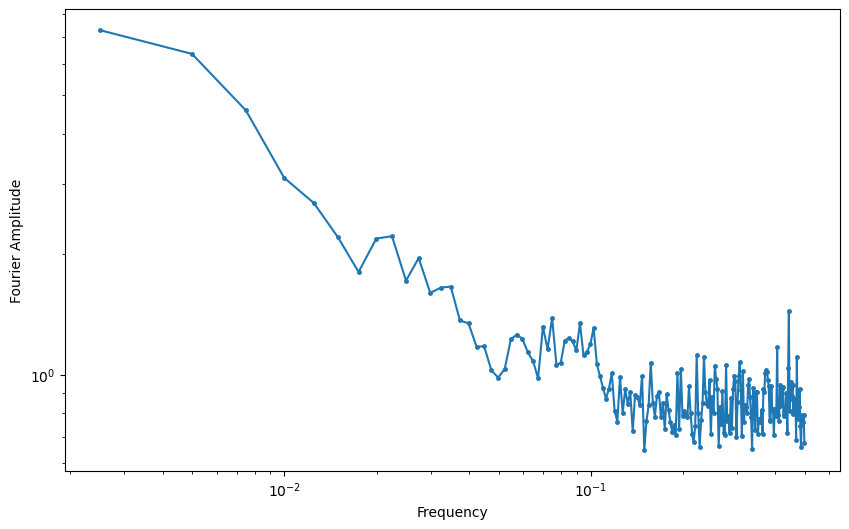

In [18]:
acf = res[1][lag:]
amp = np.abs(rfft(acf))
freq = fftfreq(len(acf))[:len(amp)]

plt.figure(figsize=(10,6))
plt.plot(freq[1:], amp[1:], marker='o', markersize=2.5)
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### c) Compute the exponent $\beta$

In [19]:
freq_v2 = freq[1:35]
amp_v2 = amp[1:35]

In [20]:
result3 = linregress(np.log(freq_v2[1:7]), np.log(amp_v2[1:7]))
result3.slope, result3.rvalue**2

(-1.0002678568753904, 0.9928572756931164)

In [21]:
result4 = linregress(np.log(freq_v2[9:]), np.log(amp_v2[9:]))
result4.slope, result4.rvalue**2

(-0.35738290479428964, 0.4865654294479661)

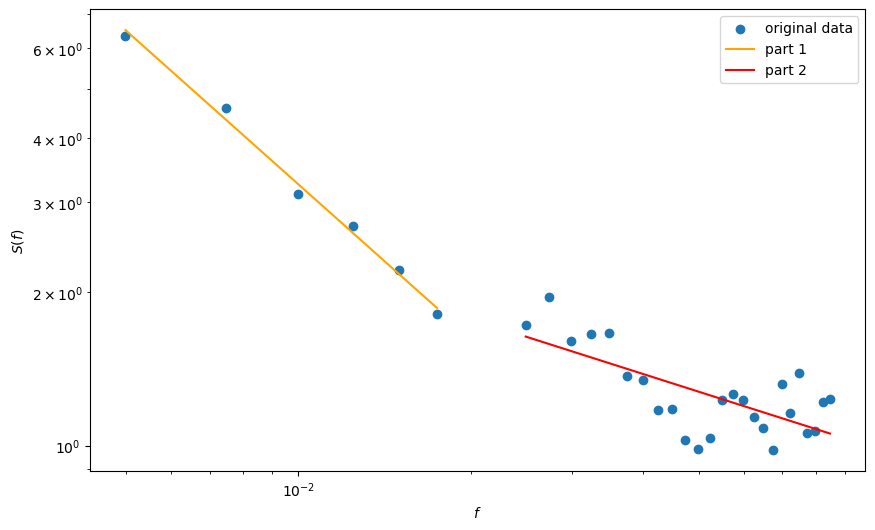

In [22]:
plt.figure(figsize=(10,6))
new = [1,2,3,4,5,6]
new += [i for i in range(9, 34)]
plt.scatter(freq_v2[new], amp_v2[new], label='original data')
plt.plot(freq_v2[1:7], np.exp(result3.intercept + result3.slope*np.log(freq_v2[1:7])), 'orange', label='part 1')
plt.plot(freq_v2[9:], np.exp(result4.intercept + result4.slope*np.log(freq_v2[9:])), 'red', label='part 2')
plt.legend()
plt.xlabel('$f$')
plt.ylabel('$S(f)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

Conclusion:

- Discard serveal data points and get two parts. 

- $\beta_{1} = 0.3574$ at short time scale (part 2).

- $\beta_{2} = 1.0003$ at long time scale (part 1).

- Acutally the fitting effect is not good in part 2(short time scale), so I think in this part, maybe we don't have sufficinet evidence to show power spectral density follows a power law.

#### d) Verify the relation: $\beta = 2\alpha-1$

- Short time scale: $2\alpha_{1}-\beta_{1}=2*0.6376-0.3574=0.9178$

- Long time scale: $2\alpha_{2}-\beta_{2}=2*1.0291-1.0003=1.0579$

- As we can see from the above result, for both short time scale and long time scale, the relation of $\beta = 2\alpha-1$ almost satisfied.